In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import json
import requests
import datetime as dt

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 3331, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-7-7d56a4e023d0>", line 1, in <module>
    get_ipython().run_line_magic('matplotlib', 'inline')
  File "/usr/local/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 2317, in run_line_magic
    result = fn(*args, **kwargs)
  File "<decorator-gen-108>", line 2, in matplotlib
  File "/usr/local/lib/python3.7/site-packages/IPython/core/magic.py", line 187, in <lambda>
    call = lambda f, *a, **k: f(*a, **k)
  File "/usr/local/lib/python3.7/site-packages/IPython/core/magics/pylab.py", line 99, in matplotlib
    gui, backend = self.shell.enable_matplotlib(args.gui.lower() if isinstance(args.gui, str) else args.gui)
  File "/usr/local/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 3407, in enable_matplotlib
    gui, backend = pt.find_gui_and

FileNotFoundError: [Errno 2] No such file or directory

Webcrawler to update Tom Tom Traffic Index data from https://www.tomtom.com/en_gb/traffic-index/ranking/ for 25 cities in Germany.

In [6]:

cities_germany = ["hamburg", "berlin", "wiesbaden", "munich", "nuremberg", "stuttgart", "bonn", "kassel", "bremen", "cologne", "kiel", "dresden", "dusseldorf", "leipzig", "freiburg", "karlsruhe", "augsburg", "monchengladbach", "mannheim", "munster", "hannover", "bielefeld", "wuppertal", "ruhr-region-west", "ruhr-region-east"]
#, "frankfurt-am-main" has no data for ratio to 2019

url_corona = "https://api.midway.tomtom.com/ranking/dailyStats/DEU_"

#build common dataframe
time = []
weekday = []
week = []
url_corona_munich = "https://api.midway.tomtom.com/ranking/dailyStats/DEU_munich"
req = requests.get(url_corona_munich)
json = req.json()
count = len(json)-1

# append each item in the json file to the empty lists
i=0
while i<=count:
    #for corona data
    time.append(json[i]["date"])
    weekday.append(json[i]["weekday"])
    week.append(json[i]["week"])
    i+=1
df_daily = pd.DataFrame({"Date":time, "weekday": weekday, "week": week}, index=time)
df_daily.index.name = "Time"

    
for city in cities_germany:
    url_corona_city = url_corona + city
    req = requests.get(url_corona_city)
    json = req.json()

    pd.set_option("display.max_rows", False)
    # create empty lists of append data
    traffic_congestion = []
    time = []
    traffic_diffRatio_to2019 = []
    weekday = []
    week = []

    count = len(json)-1

    # append each item in the json file to the empty lists
    i=0
    while i<=count:
        #for corona data
        traffic_congestion.append(json[i]["congestion"])
        time.append(json[i]["date"])
        traffic_diffRatio_to2019.append(json[i]["diffRatio"])
        weekday.append(json[i]["weekday"])
        week.append(json[i]["week"])
        i+=1

    # create dataframe with the traffic data 
    df = pd.DataFrame({"traffic_congestion_" + city:traffic_congestion, "traffic_diffRatio_to2019_" + city:traffic_diffRatio_to2019}, index=time)
    df.index.name = "Time"

    df_daily = pd.merge(df_daily, df, left_index=True, right_index=True, how='inner')
  
#convert to monthly mean
df_monthly = df_daily
df_monthly.Date = pd.to_datetime(df_monthly.Date).dt.to_period('m')
df_monthly = df_monthly.groupby('Date').mean()
df_daily = df_daily.groupby('Date').mean()

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 3331, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-6-601223871dcf>", line 11, in <module>
    req = requests.get(url_corona_munich)
NameError: name 'requests' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 2044, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'NameError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.7/site-packages/IPython/core/ultratb.py", line 1148, in get_records
    return _fixed_getinnerframes(etb, number_of_lines_of_context, tb_offset)
  File "/usr/local/lib/python3.7/site-packages/IPython

NameError: name 'requests' is not defined

In [3]:
#save daily dataframe
df_daily.to_csv('CitiesGermanyTomTom_daily2020.csv')
#save monthly dataframe
df_monthly.to_csv('CitiesGermanyTomTom_monthly2020.csv')


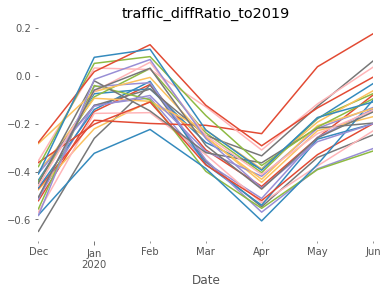

In [6]:
#monthly plot
plt.style.use("ggplot")
for column in df_monthly:
    if "traffic_diffRatio_to2019" in column:
        ax = df_monthly[column].plot()
#ax = df_monthly["traffic_diffRatio_to2019_munich"].plot(color="Green")
plt.title("traffic_diffRatio_to2019")
#plt.legend(loc=2)
plt.box(False)


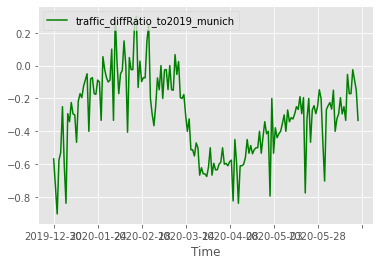

In [7]:
#daily plot
plt.style.use("ggplot")
ax = df_daily["traffic_diffRatio_to2019_munich"].plot(color="Green")
#plt.title("Munich Traffic")
plt.legend(loc=2)
#plt.box(False)